# Introdução à processamento de imagens

## Gerar e remover ruidos gaussianos

Inicialmente iremos importar o OpenCV e algumas libs

In [20]:
import cv2
import numpy
import matplotlib.pyplot as plt
import sys
%matplotlib inline


Vamos criar uma função que aplica um ruido gaussiano na imagems, esse ruido é calculado sobre uma distribuição normal

In [16]:
def apply_noise(image):
    num_row, num_col = image.shape
    mean = 0
    variance = 10
    sigma = variance ** 0.5
    gauss = numpy.random.normal(mean, sigma, (num_row, num_col))
    gauss = gauss.reshape(num_row, num_col)
    noisy = gauss + image
    return noisy

Vamos plotar uma distribuição normal e o ruido gerado de forma aleatória

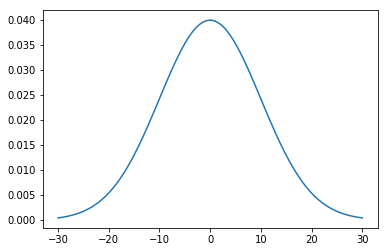

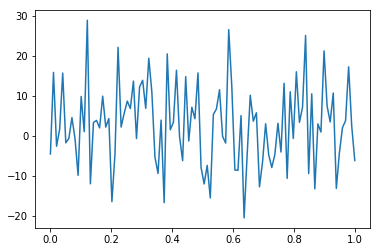

In [40]:
import matplotlib.mlab as mlab
image = cv2.imread('imagens/lena.jpg', 0)
size = 100
mean = 0
variance = 100
sigma = variance ** 0.5
gauss = numpy.random.normal(mean, sigma, size)
x = numpy.linspace(0, 1, size)

xi = numpy.linspace(mean - 3*sigma, mean + 3*sigma, 100)
plt.plot(xi,mlab.normpdf(xi, mean, sigma))
plt.show()

plt.plot(x, gauss)
plt.show()


E como comparar duas imagens? Precisamos de uma medida de comparação, para isso vamos escolher o MSE (erro médio quadrado)

In [43]:
def mse(imageA, imageB):
    err = numpy.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    return err

Vamos importar uma imagem e converter para escala de cinza

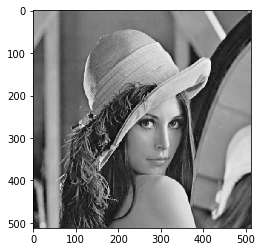

In [63]:
image = cv2.imread('imagens/lena.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB);
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY);


plt.imshow(gray_image, 'gray')
plt.show()



Agora vamos aplicar o ruido na imagem

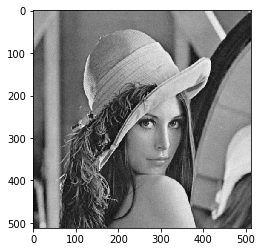

In [67]:
noisy_image = apply_noise(gray_image)
plt.imshow(noisy_image, 'gray')
plt.show()

Em seguida vamos medir o MSE entre as duas

In [68]:
print(mse(gray_image, noisy_image))

10.0282244282


Agora vamos tentar remover o ruido com um blur gaussiano e verificar o MSE

In [69]:
filter_image = cv2.GaussianBlur(noisy_image, (5,5), 0)
print(mse(noisy_image, filter_image))

32.646006704
